In [63]:
#loading required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

#including the images in the notebook
%matplotlib inline

In [3]:
#reading data
data = pd.read_csv("movie_metadata.csv")

## Examining The Data

In [4]:
#number of rows and columns
(rows,columns)=data.shape
print(rows,columns)

(5043, 28)


In [5]:
#column names
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [7]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
data.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [9]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## Missing Data

In [10]:
#function for counting the number of missing values
def null_count(column, countonly=True, missingperc=False):
    """
    returns a new series with the column name and missing values count
    """
    column_null = pd.isnull(column)
    null = column[column_null]
    if countonly:
        return len(null)

In [11]:
%%time
#applying function "null_count" on each column of the dataframe by default gives null count
column_null_count = data.apply(null_count)

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 25.5 ms


### If the dataset is larger, apply function takes longer performance wise. Can we optimize to execute quickly?  May be by using vectorized functions.

In [12]:
%%time
column_null_count=data.isnull().sum().sort_values()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 7.49 ms


In [13]:
np.round(((column_null_count/rows)*100).sort_values(ascending=False),2)

gross                        17.53
budget                        9.76
aspect_ratio                  6.52
content_rating                6.01
plot_keywords                 3.03
title_year                    2.14
director_name                 2.06
director_facebook_likes       2.06
num_critic_for_reviews        0.99
actor_3_name                  0.46
actor_3_facebook_likes        0.46
num_user_for_reviews          0.42
color                         0.38
duration                      0.30
actor_2_facebook_likes        0.26
facenumber_in_poster          0.26
actor_2_name                  0.26
language                      0.24
actor_1_name                  0.14
actor_1_facebook_likes        0.14
country                       0.10
movie_facebook_likes          0.00
genres                        0.00
movie_title                   0.00
num_voted_users               0.00
movie_imdb_link               0.00
imdb_score                    0.00
cast_total_facebook_likes     0.00
dtype: float64

<p> We can see that gross variables 17.53% of all total values are missing

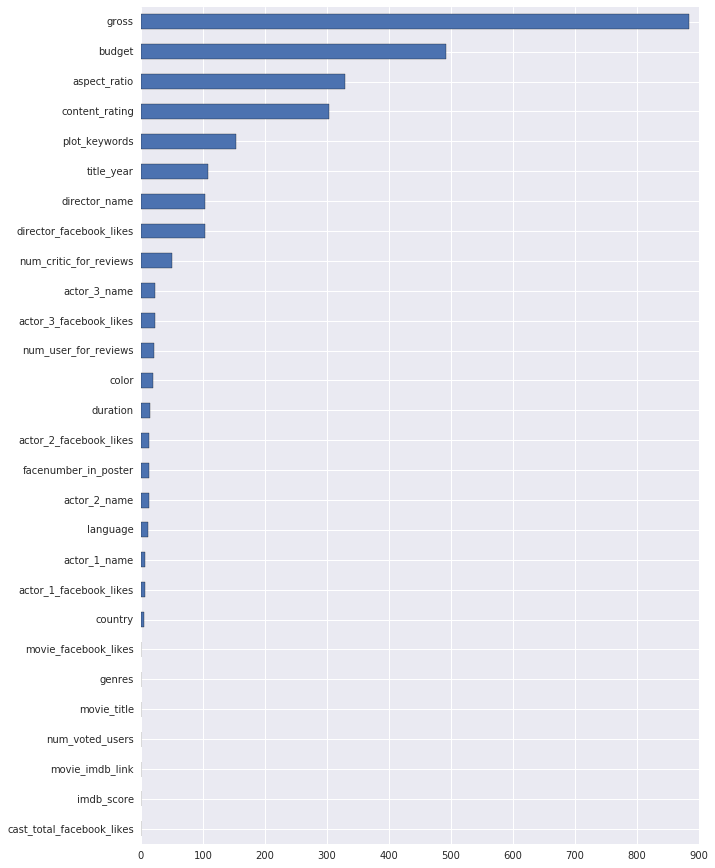

In [14]:
#by default ascending, to print in descending order, provide "ascending=False" as a parameter
column_null_count=column_null_count.sort_values()
column_null_count.plot(kind='barh', figsize=(10,15))

## Exploratory Data Analysis

### IMDB Rating

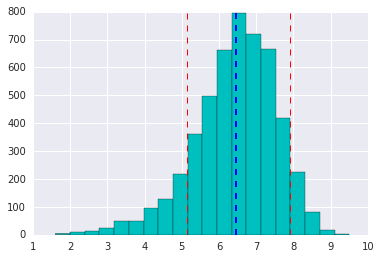

In [15]:
imdb_score_plot = plt.hist(data['imdb_score'], bins=20, color='c')

plt.axvline(data['imdb_score'].mean(), color='b', linestyle='dashed', linewidth=2)

plt.axvline(5.15, color='r', linestyle='dashed', linewidth=1)

plt.axvline(7.9, color='r', linestyle='dashed', linewidth=1)

<p> We can see the outcome variable "imdb_score" is mostly distributed around 6.5. Movies having imdb rating more than 8 are considered to great movies and they are in the top list of the IMDB. Movies with rating from 5.2 to 8 are considered to be good movies. Movies with rating from 1 to 5 are considered as not good movies.

### Title Year

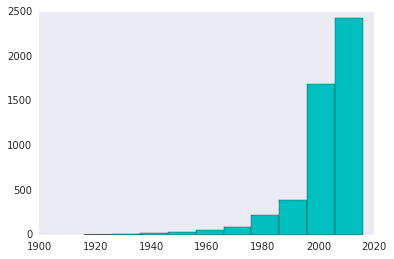

In [16]:
data['title_year'].hist(grid=False, color='c')

<p> Most of the movies have been released from the end of 1999 as per the data in this dataset

### IMDB Rating vs Title Year

In [17]:
#there nan values in the title_year column, so can't convert to int. We need to fill the na values with 0 and then convert to int
data['title_year'] = data.title_year.fillna(0).astype(int)

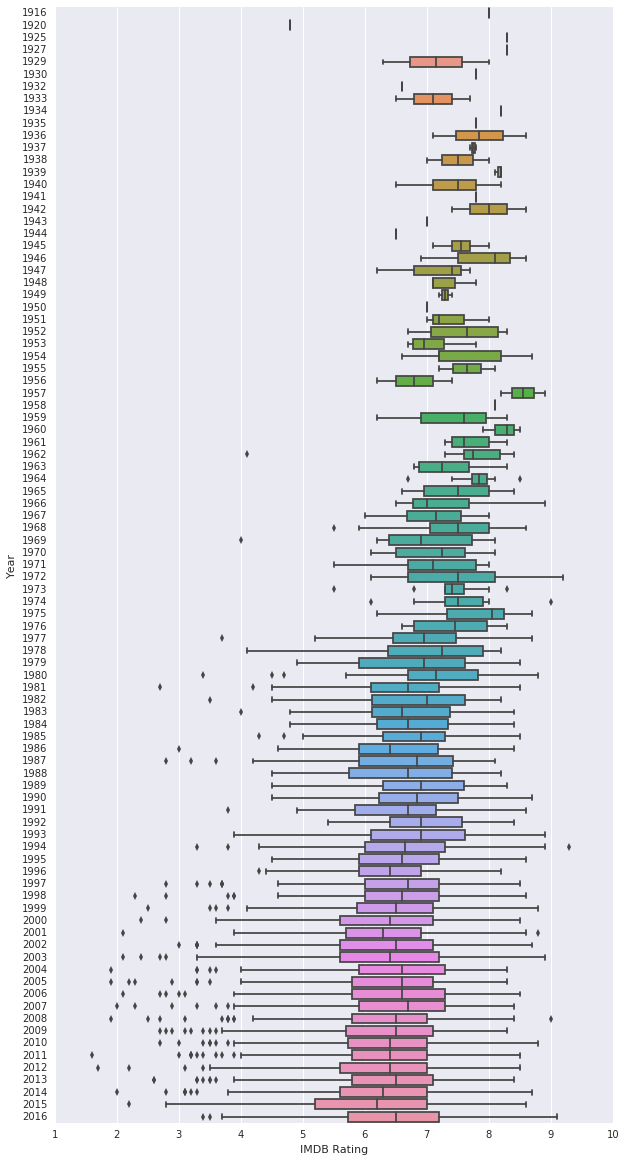

In [18]:
filtered = data.loc[data['title_year']!=0,:]
f, ax = plt.subplots(figsize=(10, 20))
sns.boxplot(x='imdb_score',y='title_year',data=filtered, orient="h")
ax.set(xlabel='IMDB Rating', ylabel='Year')

<p> Number of movies produced increased from the mid 1960's along with the technology (color film). There are also many movies from 1997 which have low imdb rating.

### IMDB Rating vs Country

In [30]:
def boxplot_sorted(df, by, column):
    """
    Takes in dataframe, by - category column or columns with a list, column - numeric
    """
    new = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = new.median().sort_values()
    fig = plt.figure(figsize=(15,10))
    new[meds.index].boxplot(grid=False,rot=90)

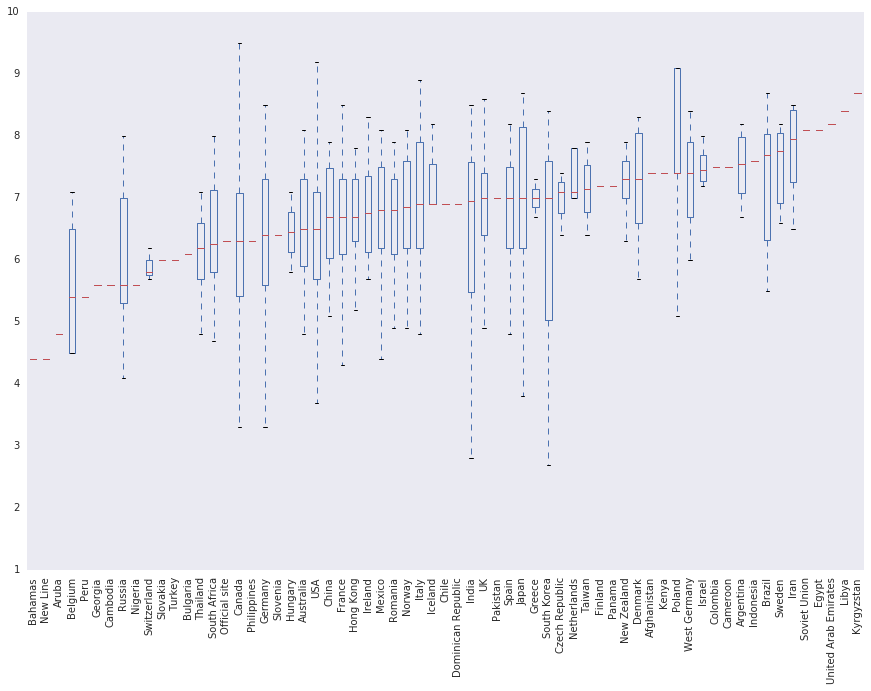

In [31]:
boxplot_sorted(data, by=["country"], column="imdb_score")

<p> Compared to other countries, both USA and UK has movies with low rating and with low median ratings. USA,UK,India, South Korea, Canada, Germany have released movies significantly compared to other countries.

### IMDB Rating vs Language

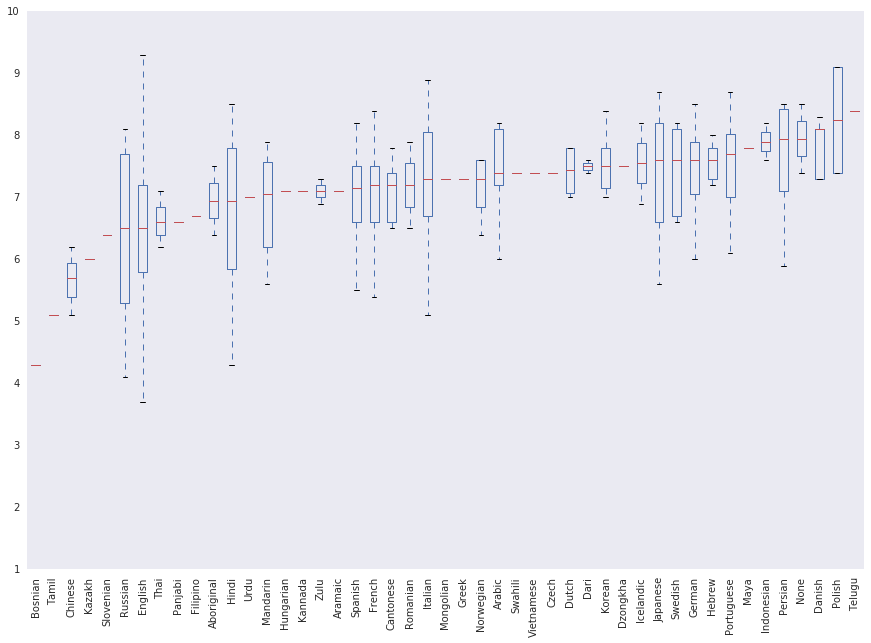

In [32]:
boxplot_sorted(data, by=["language"], column="imdb_score")

<p> Singificant number of movies have been released in English and then Hindi. Also, there are movies with low rating in English compared to other language movies.

### IMDB Rating vs Color

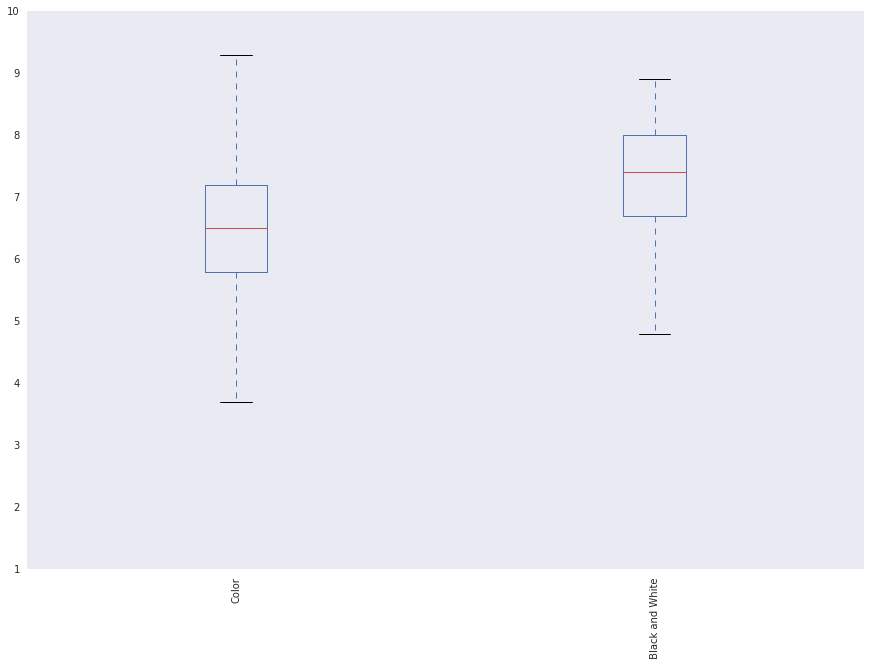

In [33]:
boxplot_sorted(data, by=["color"], column="imdb_score")

<p> From the plot, there significant number of movies are poduced in color. But there are also good movies in black and white. More number of movies with low rating in Color than Black & White.

### IMDB Rating vs Movie Facebook Popularity

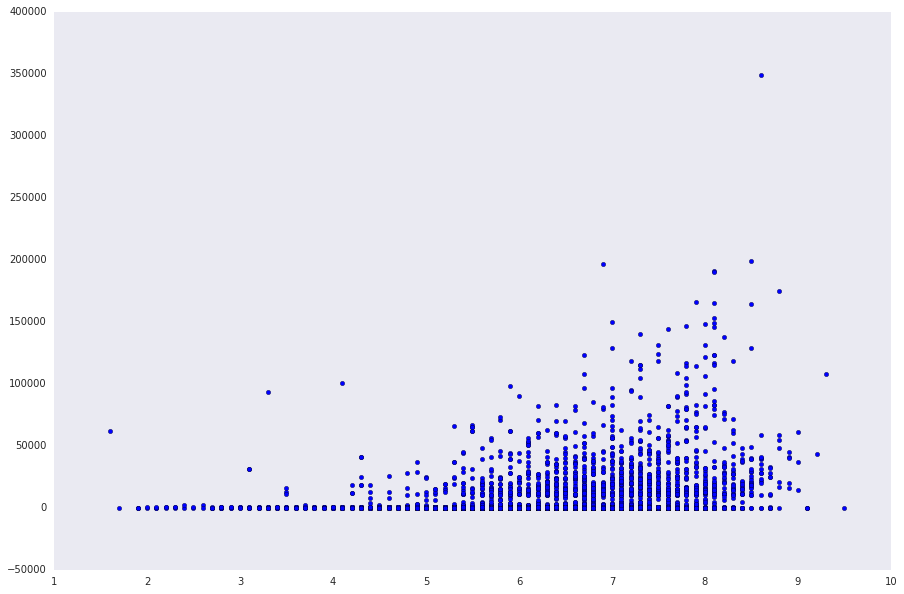

In [42]:
fig = plt.figure(figsize=(15,10))
plt.scatter(data['imdb_score'],data['movie_facebook_likes'])
plt.grid(False)

In [35]:
data.loc[data['imdb_score']>=8,:]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012,21000.0,8.1,1.85,123000
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016,19000.0,8.2,2.35,72000
43,Color,Lee Unkrich,453.0,103.0,125.0,721.0,John Ratzenberger,15000.0,414984497.0,Adventure|Animation|Comedy|Family|Fantasy,...,733.0,English,USA,G,200000000.0,2010,1000.0,8.3,1.85,30000
47,Color,Bryan Singer,539.0,149.0,0.0,20000.0,Peter Dinklage,34000.0,233914986.0,Action|Adventure|Fantasy|Sci-Fi|Thriller,...,752.0,English,USA,PG-13,200000000.0,2014,22000.0,8.0,2.35,82000
58,Color,Andrew Stanton,421.0,98.0,475.0,522.0,Fred Willard,1000.0,223806889.0,Adventure|Animation|Family|Sci-Fi,...,1043.0,English,USA,G,180000000.0,2008,729.0,8.4,2.35,16000
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008,13000.0,9.0,2.35,37000
67,Color,Pete Docter,408.0,96.0,0.0,262.0,Delroy Lindo,1000.0,292979556.0,Adventure|Animation|Comedy|Family,...,704.0,English,USA,PG,175000000.0,2009,848.0,8.3,1.85,27000
78,Color,Pete Docter,536.0,95.0,0.0,384.0,Mindy Kaling,1000.0,356454367.0,Adventure|Animation|Comedy|Drama|Family|Fantasy,...,773.0,English,USA,PG,175000000.0,2015,767.0,8.3,1.85,118000
93,Color,Dean DeBlois,288.0,98.0,255.0,759.0,America Ferrera,18000.0,217387997.0,Adventure|Animation|Family|Fantasy,...,492.0,English,USA,PG,165000000.0,2010,953.0,8.2,2.35,33000


<p> There are movies with good rating but still facebook likes aren't high, may be the movies have released long back and facebook pages are created after. Even there are facebook page likes are zero for high rating movies. Don't think it will be good predictor as there will be high bias.

### IMDB Rating vs Director Facebook Popularity

(0, 25000)

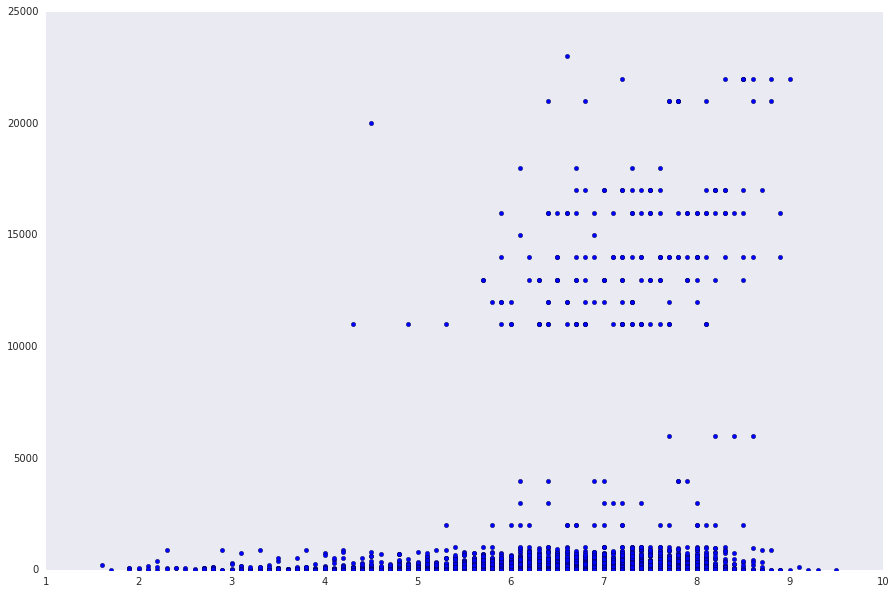

In [44]:
fig = plt.figure(figsize=(15,10))
plt.scatter(data['imdb_score'],data['director_facebook_likes'])
plt.grid(False)
plt.ylim(0,25000)

In [37]:
data.loc[data['imdb_score']>=6,:]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,0,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009,11000.0,7.5,2.35,10000


<p> We know that the better director would take a better movie. Mostly the movies with >6 rating, the facebook popularity is more compared to <6 rating movie directors.

### IMDB Rating vs Actors1,2,3 Facebook Popularity

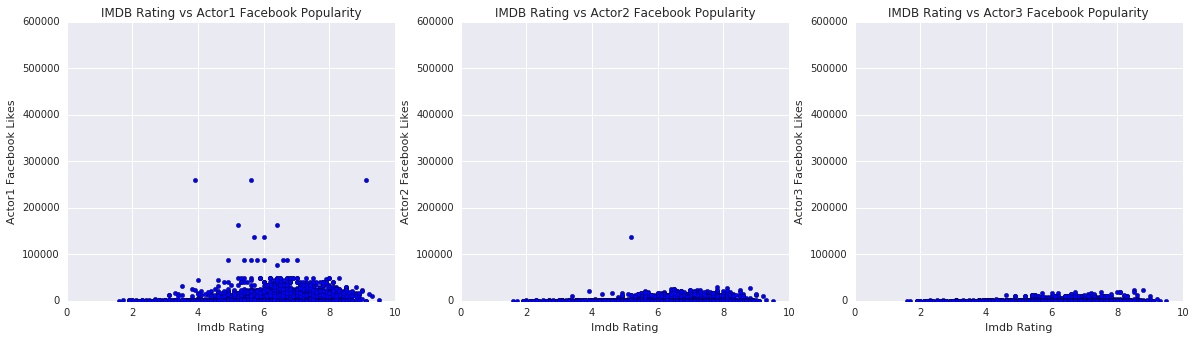

In [38]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(data['imdb_score'],data['actor_1_facebook_likes'])
ax1.set_title('IMDB Rating vs Actor1 Facebook Popularity')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 600000)
ax1.set_xlabel('Imdb Rating')
ax1.set_ylabel('Actor1 Facebook Likes')

ax2.scatter(data['imdb_score'],data['actor_2_facebook_likes'])
ax2.set_title('IMDB Rating vs Actor2 Facebook Popularity')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 600000)
ax2.set_xlabel('Imdb Rating')
ax2.set_ylabel('Actor2 Facebook Likes')

ax3.scatter(data['imdb_score'],data['actor_3_facebook_likes'])
ax3.set_title('IMDB Rating vs Actor3 Facebook Popularity')
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 600000)
ax3.set_xlabel('Imdb Rating')
ax3.set_ylabel('Actor3 Facebook Likes')

<p> From the plots we that Actor 1 is more popular than other actors(Actor2/Actor3). But that doesn't mean higher facebook popularity of a leading actor/actress will lead to higher movie rating.

### IMDB Rating vs Number of Faces in the poster

(0, 50)

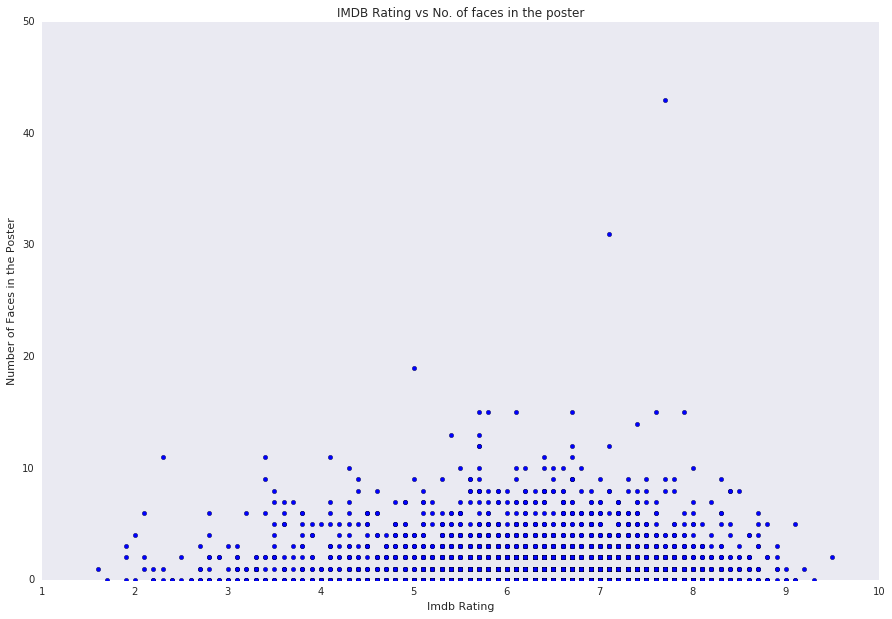

In [45]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(data['imdb_score'],data['facenumber_in_poster'])
ax1.set_title('IMDB Rating vs No. of faces in the poster')
ax1.set_xlabel('Imdb Rating')
ax1.set_ylabel('Number of Faces in the Poster')

plt.grid(False)
plt.ylim(0,50)

<p> We can see from the plot that less number of faces in the poster will have a high rating. However, few movies with more number of faces also have a high rating. There are few posters with out a human, Google Cloud Vision API did not recognize. You can read [my article](https://medium.com/@jeevananandanne/face-detection-using-google-cloud-vision-api-47d607917977) written on my medium blog for recognizing the number of faces in an image.

## Correlation Matrix

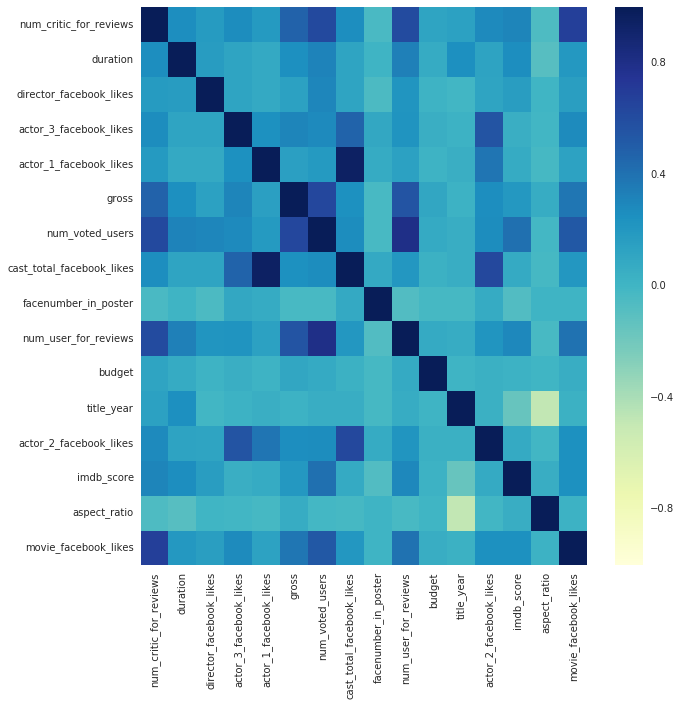

In [39]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu")

* The "cast_total_facebook_likes" has a strong positive correlation with the "actor_1_facebook_likes", and has smaller positive correlation with both "actor_2_facebook_likes" and "actor_3_facebook_likes"
* The "movie_facebook_likes" has strong correlation with "num_critic_for_reviews", meaning that the popularity of a movie in social network can be largely affected by the critics
* The "movie_facebook_likes" has relatively large correlation with the "num_voted_users"
* The movie "gross" has strong positive correlation with the "num_voted_users".

Surprisingly, there are some pairwise correlations that are perhaps counter-intuitive:

* The "imdb_score" has very small but positive correlation with the "director_facebook_likes", meaning a popular director does not necessarily mean his directed movie is great.
* The "imdb_score" has very small but positive correlation with the "actor_1_facebook_likes", meaning that an actor is popular in social network does not mean that a movie is high rating if he is the leading actor. So do supporting actors.
* The "imdb_score" has small but positive correlation with "duration". Long movies tend to have high rating.
* The "imdb_score" has small but negative correlation with "facenumber_in_poster". It is perhaps not a good idea to have many faces in movie poster if a movie wants to be great.
* The "imdb_score" has almost no correlation with "budget". Spending lot of money on a movie will not necessarily make it great.

## Model Building

In [165]:
#removed all rows with missing for modeling
new_data = data.dropna()

In [166]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

### Machine Learning with Tensorflow

* We'll use 80% of our dataset for training and 20% of the data for testing the model we have trained. Let's shuffle the rows of the Pandas dataframe so that this division is random. The predictor (or input) columns will be every column in the database other than the imdb_score (which is our target, or what we want to predict).


* The machine learning models that we will use -- linear regression and neural networks -- both require that the input variables are numeric in nature. If there are any categorical variables, we have one hot encode.


In [168]:
shuffled = new_data.sample(frac=1, random_state=13)
def columns_list(column_list):
# It would be a good idea, if we had more data, to treat the days as categorical variables
# with the small amount of data, we have though, the model tends to overfit
  predictors = shuffled.loc[:,column_list]
  return predictors

### Linear regression with tf.contrib.learn

#### Model Function

In [169]:
def model(predictors):
    trainsize = int(len(shuffled['imdb_score']) * 0.8)
    testsize = len(shuffled['imdb_score']) - trainsize
    npredictors = len(predictors.columns)
    print("Number of predictors: ",npredictors)
    noutputs = 1
    tf.logging.set_verbosity(tf.logging.WARN) # change to INFO to get output every 100 steps ...
    shutil.rmtree('./trained_model_linear', ignore_errors=True) # so that we don't load weights from previous runs
    estimator = tf.contrib.learn.LinearRegressor(model_dir='./trained_model_linear',
                                             feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values))

    print "starting to train ... this will take a while ... use verbosity=INFO to get more verbose output"
    def input_fn(features, targets):
        return tf.constant(features.values), tf.constant(targets.values.reshape(len(targets), noutputs))
    estimator.fit(input_fn=lambda: input_fn(predictors[:trainsize], targets[:trainsize]), steps=10000)

    pred = np.multiply(list(estimator.predict(predictors[trainsize:].values)),1)
    rmse = np.sqrt(np.mean(np.power((targets[trainsize:].values - pred), 2)))
    print 'LinearRegression has RMSE of {0}'.format(rmse)

##### First Model
Building the model with only the variables 'director_facebook_likes','duration','title_year','budget'

In [170]:
predictors=columns_list(['director_facebook_likes','duration','title_year','budget'])

predictors[:5]

,director_facebook_likes,duration,title_year,budget
1152,23.0,99.0,2010,44000000.0
1453,16000.0,137.0,2011,35000000.0
1677,301.0,118.0,2014,30000000.0
1927,68.0,90.0,2007,25000000.0
3401,73.0,79.0,1991,8000000.0


In [171]:
shuffled[:5]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1152,Color,Burr Steers,117.0,99.0,23.0,135.0,Charlie Tahan,405.0,31136950.0,Drama|Fantasy|Romance,...,75.0,English,USA,PG-13,44000000.0,2010,268.0,6.5,2.35,0
1453,Color,Clint Eastwood,392.0,137.0,16000.0,363.0,Naomi Watts,29000.0,37304950.0,Biography|Crime|Drama,...,279.0,English,USA,R,35000000.0,2011,6000.0,6.6,2.35,16000
1677,Color,Scott Derrickson,242.0,118.0,301.0,897.0,Dorian Missick,2000.0,30523568.0,Horror|Mystery|Thriller,...,201.0,English,USA,R,30000000.0,2014,1000.0,6.2,2.35,18000
1927,Color,Steve Bendelack,151.0,90.0,68.0,100.0,Emma de Caunes,328.0,32553210.0,Comedy|Family,...,235.0,English,UK,PG,25000000.0,2007,132.0,6.3,1.85,0
3401,Color,Mark L. Lester,45.0,79.0,73.0,112.0,Tia Carrere,1000.0,2275557.0,Action|Comedy|Crime|Thriller,...,102.0,English,USA,R,8000000.0,1991,1000.0,6.0,1.85,0


In [172]:
targets = shuffled.loc[:,'imdb_score']
targets[:5]

1152    6.5
1453    6.6
1677    6.2
1927    6.3
3401    6.0
Name: imdb_score, dtype: float64

In [173]:
model(predictors)

('Number of predictors: ', 4)
starting to train ... this will take a while ... use verbosity=INFO to get more verbose output
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
LinearRegression has RMSE of 6.79111199466


##### Second Model
Building the model with only the variables 'director_facebook_likes','duration','title_year','budget','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'

In [174]:
predictors=columns_list(['director_facebook_likes','duration','title_year','budget','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'])

predictors[:5]

,director_facebook_likes,duration,title_year,budget,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
1152,23.0,99.0,2010,44000000.0,405.0,268.0,135.0
1453,16000.0,137.0,2011,35000000.0,29000.0,6000.0,363.0
1677,301.0,118.0,2014,30000000.0,2000.0,1000.0,897.0
1927,68.0,90.0,2007,25000000.0,328.0,132.0,100.0
3401,73.0,79.0,1991,8000000.0,1000.0,1000.0,112.0


In [175]:
model(predictors)

('Number of predictors: ', 7)
starting to train ... this will take a while ... use verbosity=INFO to get more verbose output
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
LinearRegression has RMSE of 6.71190517536


We see slight improvement, but not significant improvement. Lets try including 'color' variable

#### Third Model

Building the model with only the variables 'director_facebook_likes','duration','title_year','budget','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','color'

* Here color is an object variable (Categorical), lets try to create dummy variables


In [176]:
one_hot = pd.get_dummies(new_data['color'])
new_data = new_data.drop('color', axis=1)
new_data = new_data.join(one_hot)

In [177]:
new_data[1:5]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Black and White,Color
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0,0,1
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000,0,1
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000,0,1
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000,0,1


In [178]:
new_data.columns

Index([u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes',
       u' Black and White', u'Color'],
      dtype='object')

There are some column name inconsistencies with the newly created dummy variables.

In [179]:
new_data=new_data.rename(columns = {' Black and White':'blackandwhite','Color':'color'})

In [185]:
shuffled = new_data.sample(frac=1, random_state=13)
new_data.columns

Index([u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes',
       u'blackandwhite', u'color'],
      dtype='object')

In [186]:
new_data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,blackandwhite,color
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000,0,1
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0,0,1
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000,0,1
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000,0,1
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000,0,1


In [187]:
predictors=columns_list(['director_facebook_likes','duration','title_year','budget',\
                         'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','blackandwhite','color'])

predictors[:5]

,director_facebook_likes,duration,title_year,budget,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blackandwhite,color
1152,23.0,99.0,2010,44000000.0,405.0,268.0,135.0,0,1
1453,16000.0,137.0,2011,35000000.0,29000.0,6000.0,363.0,0,1
1677,301.0,118.0,2014,30000000.0,2000.0,1000.0,897.0,0,1
1927,68.0,90.0,2007,25000000.0,328.0,132.0,100.0,0,1
3401,73.0,79.0,1991,8000000.0,1000.0,1000.0,112.0,0,1


In [188]:
model(predictors)

('Number of predictors: ', 9)
starting to train ... this will take a while ... use verbosity=INFO to get more verbose output
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
LinearRegression has RMSE of 6.71201091364


There is'nt any significant/slight improvement.

#### Fourth Model

Adding facenumber_in_poster

In [189]:
predictors=columns_list(['director_facebook_likes','duration','title_year','budget',\
                         'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','blackandwhite','color','facenumber_in_poster'])

predictors[:5]

,director_facebook_likes,duration,title_year,budget,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blackandwhite,color,facenumber_in_poster
1152,23.0,99.0,2010,44000000.0,405.0,268.0,135.0,0,1,1.0
1453,16000.0,137.0,2011,35000000.0,29000.0,6000.0,363.0,0,1,0.0
1677,301.0,118.0,2014,30000000.0,2000.0,1000.0,897.0,0,1,0.0
1927,68.0,90.0,2007,25000000.0,328.0,132.0,100.0,0,1,0.0
3401,73.0,79.0,1991,8000000.0,1000.0,1000.0,112.0,0,1,2.0


In [190]:
model(predictors)

('Number of predictors: ', 10)
starting to train ... this will take a while ... use verbosity=INFO to get more verbose output
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
LinearRegression has RMSE of 6.71097027364


We see slight improvement compared to the Second model. 